In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
import plotly.express as px

In [ ]:
data=pd.read_csv("/content/HR-Employee-Attrition.csv")

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.shape

(1470, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
def missingvalues(dataset):
    return dataset.isnull().sum()
missingvalues(data)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
duplicate_rows = data.duplicated().any()
duplicate_rows

False

Machine Learning

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
le = LabelEncoder()
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['Gender'] = le.fit_transform(data['Gender'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
y=data['Attrition']
X=data.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
standard_scaler = StandardScaler()

X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

X_standardized = standard_scaler.fit_transform(X)

In [ ]:
min_max_scaler = MinMaxScaler()

X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

X_normalized = min_max_scaler.fit_transform(X)

Accuracy:  0.83
Precision:  0.8666666666666667
Recall:  0.8198198198198198
F1 Score:  0.8425925925925926
Confusion Matrix:
 [[75 14]
 [20 91]]


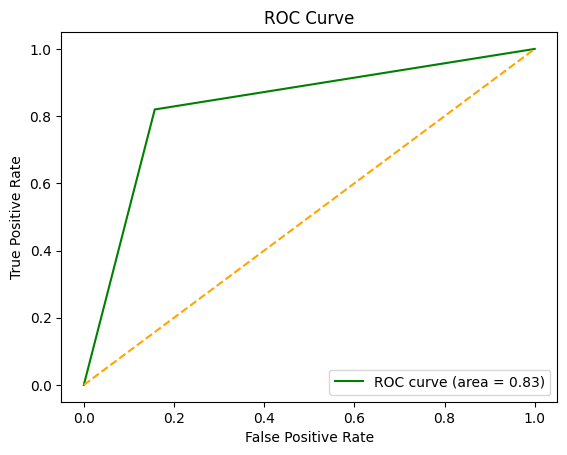

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
    plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

model = LogisticRegression(max_iter=100000)
train_predict_evaluate(model, X_train, y_train, X_test, y_test)


In [ ]:
x = data.iloc[:,:].values
x= np.delete(x,1,axis=1)
print(x[:10,:])

[[41 2 1102 2 1 2 1 1 1 2 0 94 3 2 7 4 2 5993 19479 8 'Y' 1 11 3 1 80 0 8
  0 1 6 4 0 5]
 [49 1 279 1 8 1 1 1 2 3 1 61 2 2 6 2 1 5130 24907 1 'Y' 0 23 4 4 80 1 10
  3 3 10 7 1 7]
 [37 2 1373 1 2 2 4 1 4 4 1 92 2 1 2 3 2 2090 2396 6 'Y' 1 15 3 2 80 0 7
  3 3 0 0 0 0]
 [33 1 1392 1 3 4 1 1 5 4 0 56 3 1 6 3 1 2909 23159 1 'Y' 1 11 3 3 80 0 8
  3 3 8 7 3 0]
 [27 2 591 1 2 1 3 1 7 1 1 40 3 1 2 2 1 3468 16632 9 'Y' 0 12 3 4 80 1 6
  3 3 2 2 2 2]
 [32 1 1005 1 2 2 1 1 8 4 1 79 3 1 2 4 2 3068 11864 0 'Y' 0 13 3 3 80 0 8
  2 2 7 7 3 6]
 [59 2 1324 1 3 3 3 1 10 3 0 81 4 1 2 1 1 2670 9964 4 'Y' 1 20 4 1 80 3
  12 3 2 1 0 0 0]
 [30 2 1358 1 24 1 1 1 11 4 1 67 3 1 2 3 0 2693 13335 1 'Y' 0 22 4 2 80 1
  1 2 3 1 0 0 0]
 [38 1 216 1 23 3 1 1 12 4 1 44 2 3 4 3 2 9526 8787 0 'Y' 0 21 4 2 80 0
  10 2 3 9 7 1 8]
 [36 2 1299 1 27 3 3 1 13 3 1 94 3 2 0 3 1 5237 16577 6 'Y' 0 13 3 2 80 2
  17 3 2 7 7 7 7]]


In [ ]:
y = data.Attrition
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [ ]:
y = LabelEncoder().fit_transform(y)
print(y[:10])

[1 0 1 0 0 0 0 0 0 0]


In [ ]:
x[:,10]=LabelEncoder().fit_transform(x[:,10])
x[:,20]=LabelEncoder().fit_transform(x[:,20])
x[:,21]=LabelEncoder().fit_transform(x[:,21])
print(x[:10,:])

[[41 2 1102 2 1 2 1 1 1 2 0 94 3 2 7 4 2 5993 19479 8 0 1 11 3 1 80 0 8 0
  1 6 4 0 5]
 [49 1 279 1 8 1 1 1 2 3 1 61 2 2 6 2 1 5130 24907 1 0 0 23 4 4 80 1 10 3
  3 10 7 1 7]
 [37 2 1373 1 2 2 4 1 4 4 1 92 2 1 2 3 2 2090 2396 6 0 1 15 3 2 80 0 7 3
  3 0 0 0 0]
 [33 1 1392 1 3 4 1 1 5 4 0 56 3 1 6 3 1 2909 23159 1 0 1 11 3 3 80 0 8 3
  3 8 7 3 0]
 [27 2 591 1 2 1 3 1 7 1 1 40 3 1 2 2 1 3468 16632 9 0 0 12 3 4 80 1 6 3
  3 2 2 2 2]
 [32 1 1005 1 2 2 1 1 8 4 1 79 3 1 2 4 2 3068 11864 0 0 0 13 3 3 80 0 8 2
  2 7 7 3 6]
 [59 2 1324 1 3 3 3 1 10 3 0 81 4 1 2 1 1 2670 9964 4 0 1 20 4 1 80 3 12
  3 2 1 0 0 0]
 [30 2 1358 1 24 1 1 1 11 4 1 67 3 1 2 3 0 2693 13335 1 0 0 22 4 2 80 1 1
  2 3 1 0 0 0]
 [38 1 216 1 23 3 1 1 12 4 1 44 2 3 4 3 2 9526 8787 0 0 0 21 4 2 80 0 10
  2 3 9 7 1 8]
 [36 2 1299 1 27 3 3 1 13 3 1 94 3 2 0 3 1 5237 16577 6 0 0 13 3 2 80 2
  17 3 2 7 7 7 7]]


In [ ]:
categorical_columns = [1, 3, 6, 14, 16]
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)
x_transformed = ct.fit_transform(x)
print(x_transformed[:10, :])

[[0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 0.0 0.0 1.0 41 1102 1 2 1 1 2 0 94 3 2 4 5993 19479 8 0 1
  11 3 1 80 0 8 0 1 6 4 0 5]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  1.0 0.0 0.0 0.0 1.0 0.0 49 279 8 1 1 2 3 1 61 2 2 2 5130 24907 1 0 0 23
  4 4 80 1 10 3 3 10 7 1 7]
 [0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 1.0 37 1373 2 2 1 4 4 1 92 2 1 3 2090 2396 6 0 1 15
  3 2 80 0 7 3 3 0 0 0 0]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  1.0 0.0 0.0 0.0 1.0 0.0 33 1392 3 4 1 5 4 0 56 3 1 3 2909 23159 1 0 1
  11 3 3 80 0 8 3 3 8 7 3 0]
 [0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 1.0 0.0 27 591 2 1 1 7 1 1 40 3 1 2 3468 16632 9 0 0 12
  3 4 80 1 6 3 3 2 2 2 2]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 1.0 32 1005 2 2 1 8 4 1 79 3 1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy 84.13%
[[351  10]
 [ 60  20]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       361
           1       0.67      0.25      0.36        80

    accuracy                           0.84       441
   macro avg       0.76      0.61      0.64       441
weighted avg       0.82      0.84      0.81       441



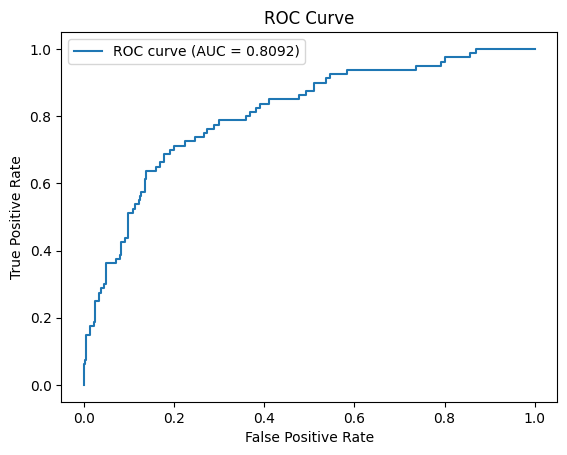

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = {0:.4f})'.format(roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy 84.35%
[[360   1]
 [ 68  12]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       361
           1       0.92      0.15      0.26        80

    accuracy                           0.84       441
   macro avg       0.88      0.57      0.59       441
weighted avg       0.86      0.84      0.79       441



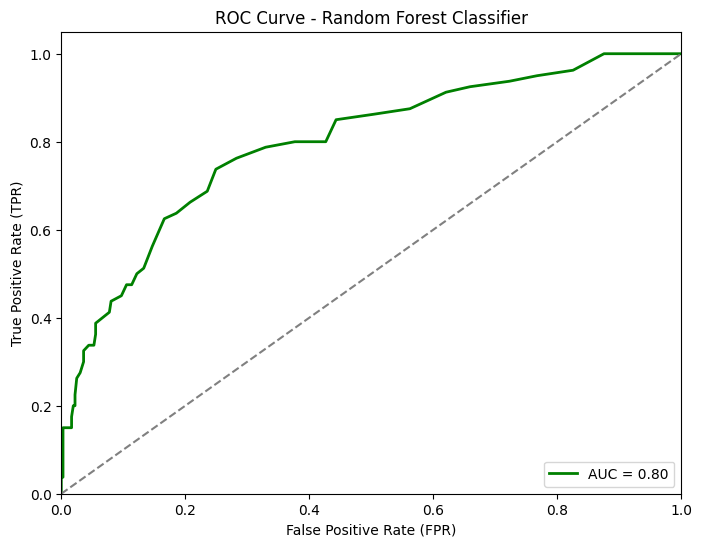

AUC-ROC Score: 0.7956890581717452


In [ ]:
y_prob_rf = model.predict_proba(x_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score:", roc_auc_rf)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [ ]:
colname=data.select_dtypes(object).columns

In [ ]:
data[colname]=oe.fit_transform(data[colname])
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.00,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.00,2.0,3.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [ ]:
features=data.iloc[:, 2:]
features['Age']=data.iloc[:,0:1]
target=data.iloc[:,1]

In [ ]:
features.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age
0,2,1102,2,1,2,1,1,1,2,0,...,80,0,8,0,1,6,4,0,5,41
1,1,279,1,8,1,1,1,2,3,1,...,80,1,10,3,3,10,7,1,7,49
2,2,1373,1,2,2,4,1,4,4,1,...,80,0,7,3,3,0,0,0,0,37
3,1,1392,1,3,4,1,1,5,4,0,...,80,0,8,3,3,8,7,3,0,33
4,2,591,1,2,1,3,1,7,1,1,...,80,1,6,3,3,2,2,2,2,27


In [ ]:
target.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC
svm=SVC()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
cr=classification_report
ac=accuracy_score

In [ ]:
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(classification_report(y_test,y_pred))
ac(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       255
         1.0       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8673469387755102

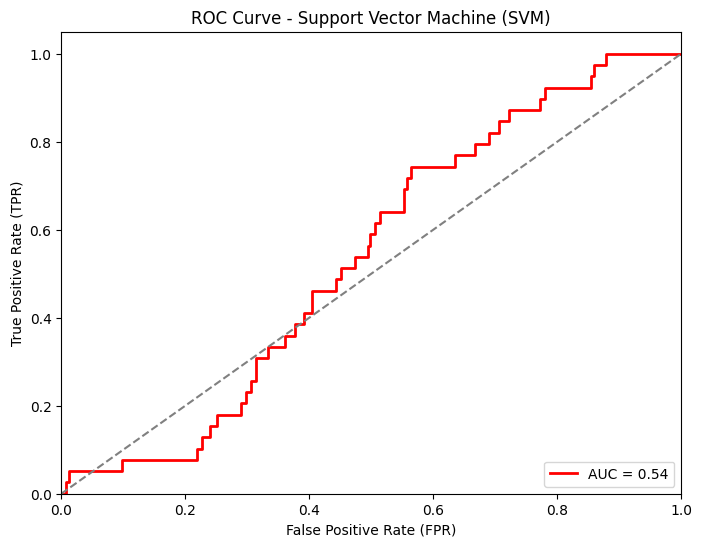

AUC-ROC Score: 0.537958773252891


In [ ]:
decision_scores = svm.decision_function(X_test)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, decision_scores)
roc_auc_svm = roc_auc_score(y_test, decision_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Support Vector Machine (SVM)')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score:", roc_auc_svm)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs'),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrix_data = confusion_matrix(y_test, y_pred)

    classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

    precision_score = classification_report_dict['macro avg']['precision']
    recall_score = classification_report_dict['macro avg']['recall']
    f1_score = classification_report_dict['macro avg']['f1-score']
    support = classification_report_dict['macro avg']['support']

    results.append({
        'Model Name': model_name,
        'Accuracy': accuracy,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1 Score': f1_score,
        'Support': support,
        'Confusion Matrix': confusion_matrix_data
    })

results_df = pd.DataFrame(results)

print(results_df.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

            Model Name  Accuracy  Precision    Recall  F1 Score  Support     Confusion Matrix
0  Logistic Regression  0.867347   0.433673  0.500000  0.464481      294  [[255, 0], [39, 0]]
1        Random Forest  0.877551   0.839446  0.549321  0.557821      294  [[254, 1], [35, 4]]
2                  SVM  0.867347   0.433673  0.500000  0.464481      294  [[255, 0], [39, 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

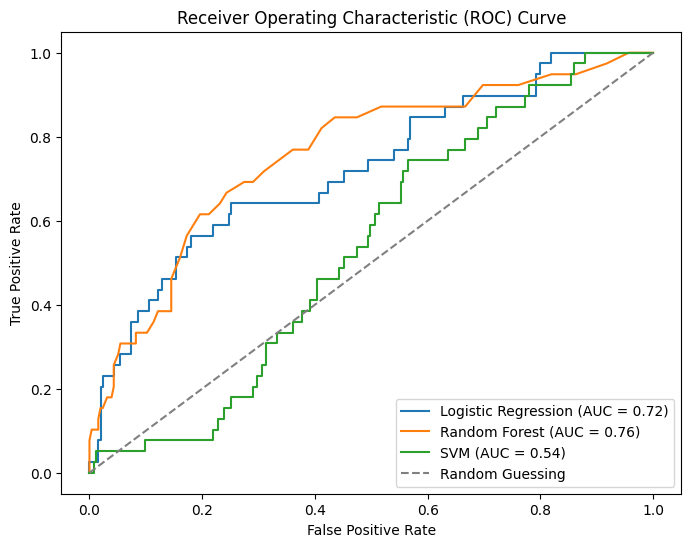

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs'),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

results = []
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrix_data = confusion_matrix(y_test, y_pred)

    classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

    precision_score = classification_report_dict['macro avg']['precision']
    recall_score = classification_report_dict['macro avg']['recall']
    f1_score = classification_report_dict['macro avg']['f1-score']
    support = classification_report_dict['macro avg']['support']

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

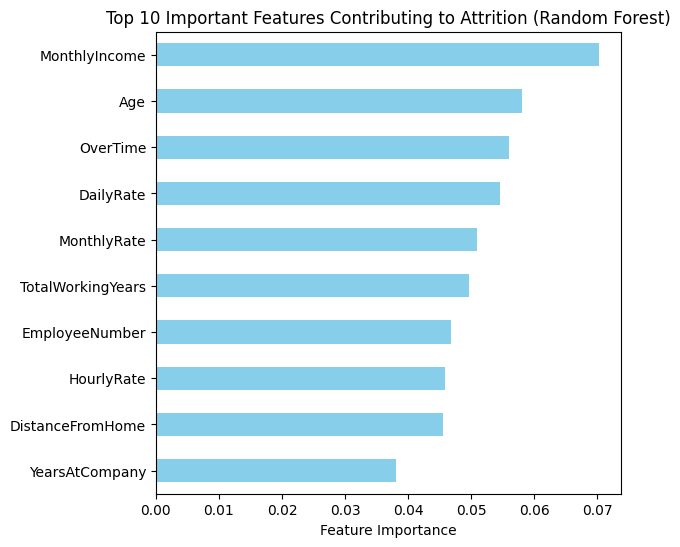

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


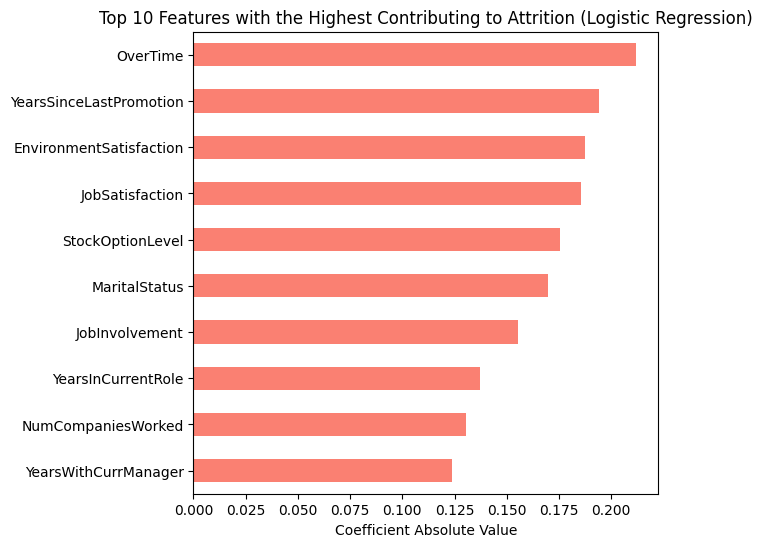

Common Features in Attrition Prediction:
{'OverTime'}


In [ ]:
x = data.iloc[:, 2:]
x['Age'] = data['Age']
y = data['Attrition']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x, y)

feature_importances = clf.feature_importances_
feat_importances_rf = pd.Series(feature_importances, index=x.columns)
top_feat_importances_rf = feat_importances_rf.nlargest(10)

plt.figure(figsize=(6, 6))
top_feat_importances_rf.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features Contributing to Attrition (Random Forest)')
plt.show()

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x, y)

coefficients = log_reg.coef_[0]
feat_importances_logreg = pd.Series(coefficients, index=x.columns)
top_feat_importances_logreg = feat_importances_logreg.abs().nlargest(10)

plt.figure(figsize=(6, 6))
top_feat_importances_logreg.sort_values().plot(kind='barh', color='salmon')
plt.xlabel('Coefficient Absolute Value')
plt.title('Top 10 Features with the Highest Contributing to Attrition (Logistic Regression)')
plt.show()

common_features = set(top_feat_importances_rf.index).intersection(top_feat_importances_logreg.index)
print("Common Features in Attrition Prediction:")
print(common_features)

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x, y)

coefficients = log_reg.coef_[0]
feat_importances_logreg = pd.Series(coefficients, index=x.columns)
top_feat_importances_logreg = feat_importances_logreg.abs().nlargest(10)

print("Top 10 Features with the Highest Contribution to Attrition (Logistic Regression):")
print(top_feat_importances_logreg)

Top 10 Features with the Highest Contribution to Attrition (Logistic Regression):
OverTime                   0.212051
YearsSinceLastPromotion    0.194392
EnvironmentSatisfaction    0.187306
JobSatisfaction            0.185697
StockOptionLevel           0.175627
MaritalStatus              0.169572
JobInvolvement             0.155222
YearsInCurrentRole         0.136985
NumCompaniesWorked         0.130557
YearsWithCurrManager       0.123762
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
